In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Project/jsbach_chorals_harmony.data')

In [3]:
df.head()

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [4]:
df.drop(['Choral ID','Event number', 'Chord label'],axis=1, inplace=True)

In [5]:
df.head()

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2


In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_transformed = oe.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_transformed)
df_pca = pca.transform(df_transformed)
pca_names = [f'pca_{i}' for i in range(len(df_pca[0]))]
df_pca = pd.DataFrame(df_pca, columns=pca_names)

<BarContainer object of 2 artists>

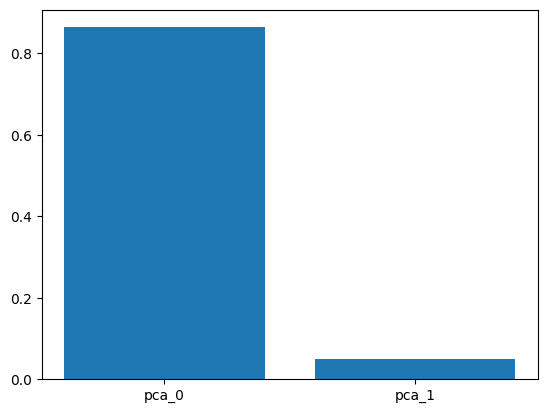

In [8]:
from matplotlib import pyplot as plt
plt.bar(pca_names, pca.explained_variance_ratio_)

In [9]:
import numpy as np
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

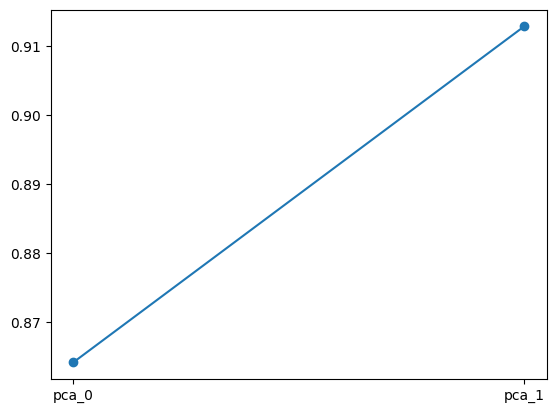

In [10]:
plt.plot(pca_names, cumulative_variance_ratio, marker='o')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=['pca_0', 'pca_1'])
df_scaled

,pca_0,pca_1
0,0.203614,0.506445
1,0.333841,0.013796
2,0.333819,0.745865
3,0.203614,0.506445
4,0.203606,0.750468
...,...,...
5660,0.066427,0.255122
5661,0.068188,0.502975
5662,0.665136,0.013168
5663,0.664918,0.503561


In [12]:
df_scaled.to_csv('../clustering_data.csv', index=False)